In [1]:
# Importing the Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns


In [2]:
# Load the Dataset to Pandas dataframe
credit_card_data = pd.read_csv('creditcard.csv')

In [3]:
# Showing 5 rows the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:

credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
# Information of Dataset
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# Check Missing Values for each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Distribution of Legit and Fraudulent transctions
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [8]:
# The Dataset is Unbalanced where 99% of data is legit
#Label 0 -- Normal transaction
#Label 1 -- Fraudulent transaction

In [9]:
# Breaking the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [10]:
#print("Proportion of Fraudulent Cases: " + str(len(dataset[dataset["Class"] == 1])/ dataset.shape[0]))
# The shape of legit and fraud transactions
print(legit.shape)
print(fraud.shape)
print("Proportion of Fraudulent Cases: " + str(len(credit_card_data[credit_card_data["Class"] == 1])/ credit_card_data.shape[0]))


(284315, 31)
(492, 31)
Proportion of Fraudulent Cases: 0.001727485630620034


In [11]:
# To see fraud transcations vs overall transactions
data_p = credit_card_data.copy()
data_p[" "] = np.where(data_p["Class"] == 1 ,  "fraud", "legit")

<Axes: ylabel='count'>

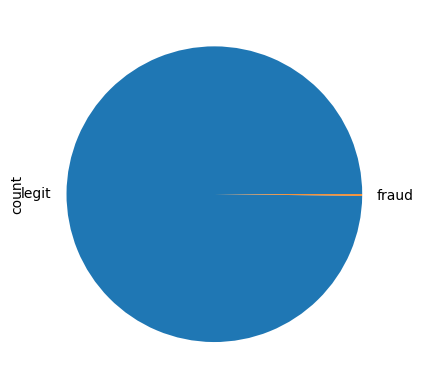

In [12]:
# plot a pie chart for the same
data_p[" "].value_counts().plot(kind="pie")

In [13]:
#statistical maesure of the data for legit and fraud
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
#Compare Values of both transaction
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [16]:
#Building a sample dataset  out of given dataset
# Number of fraudulent transaction is 492 so taking sample of 492 legit transactions
legit_sample = legit.sample(n=492)

In [17]:
#joining the legit sample 492 transactions and fraudulent 492 transactions using concate function
new_dataset = pd.concat([legit_sample,fraud],axis=0)

In [18]:
#checking the joined new dataset with top 5rows and last 5 rows
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
177198,123080.0,1.973186,-0.641150,-0.542609,0.341897,-0.577897,0.050004,-0.806373,0.161339,1.496749,...,0.135113,0.468296,0.169180,0.431069,-0.292862,0.560037,-0.034632,-0.043273,28.75,0
151075,94537.0,1.719386,0.402091,-0.899124,3.611173,1.257730,1.579898,-0.086648,0.311985,-0.045239,...,0.215670,0.854776,0.084477,-1.450250,-0.143424,0.188958,-0.033348,-0.077165,43.24,0
177683,123290.0,-5.439683,-4.147777,-5.959422,-0.887167,-13.689013,7.845434,12.571331,-1.169319,-1.840041,...,-0.997839,-0.028644,1.875669,0.590515,-0.456819,-0.687225,2.529994,-2.177994,3017.28,0
85531,60808.0,-3.940556,-3.915472,1.895930,0.716928,3.982146,-3.180268,-1.881820,-0.178257,0.954933,...,-0.396018,-0.429042,-0.578267,0.637504,-0.348859,0.012972,0.379042,-0.380173,78.41,0
188135,127833.0,-1.606631,-0.832683,0.255481,-0.601391,2.788026,-1.748567,-0.122949,0.152840,-0.428752,...,-0.066507,-0.782261,0.300438,0.651297,-0.375981,0.001595,0.009563,0.207905,1.98,0


In [19]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [20]:
new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [21]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,93217.274390,0.056618,-0.113306,-0.068841,0.070802,0.073465,-0.021720,-0.005135,0.072233,-0.030199,...,0.019525,-0.017278,0.000232,-0.024796,0.01904,-0.064227,0.022372,0.025798,-0.017661,99.251463
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.10513,0.041449,0.051648,0.170575,0.075667,122.211321


In [22]:
#Splitting the data
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [23]:
print(X)

            Time        V1        V2        V3        V4         V5        V6  \
177198  123080.0  1.973186 -0.641150 -0.542609  0.341897  -0.577897  0.050004   
151075   94537.0  1.719386  0.402091 -0.899124  3.611173   1.257730  1.579898   
177683  123290.0 -5.439683 -4.147777 -5.959422 -0.887167 -13.689013  7.845434   
85531    60808.0 -3.940556 -3.915472  1.895930  0.716928   3.982146 -3.180268   
188135  127833.0 -1.606631 -0.832683  0.255481 -0.601391   2.788026 -1.748567   
...          ...       ...       ...       ...       ...        ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293  -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850   0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308  -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092  -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670   1.151147 -0.096695   

               V7        V8

In [24]:
print(Y)

177198    0
151075    0
177683    0
85531     0
188135    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [25]:
#Split the data into train and test data
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [27]:
#Model training 

# Logistic Regression
model = LogisticRegression()

In [28]:
#Trainning logistic model with trainning dataset
model.fit(X_train, Y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
#Model Evaluation
#accuracy on training data
X_train_prediction =   model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [30]:
print('Accuracy on ta=raining data :', training_data_accuracy)

Accuracy on ta=raining data : 0.9377382465057179


In [31]:
#accuracy on test data
X_test_prediction =   model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [32]:
log = LogisticRegression()
log.fit(X_train,Y_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [33]:
Y_pred1 = log.predict(X_test)
precision_score(Y_test,Y_pred1)

0.9494949494949495

In [34]:
precision_score(Y_test,Y_pred1)

0.9494949494949495

In [35]:
recall_score(Y_test,Y_pred1)

0.9591836734693877

In [36]:
recall_score(Y_test,Y_pred1)

0.9591836734693877

In [37]:
f1_score(Y_test,Y_pred1)

0.9543147208121828

In [38]:
#Decision tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train)
DecisionTreeClassifier()
Y_pred2 = dt.predict(X_test)

In [39]:
accuracy_score(Y_test,Y_pred2)

0.8781725888324873

In [40]:
precision_score(Y_test,Y_pred2)

0.8363636363636363

In [41]:
f1_score(Y_test,Y_pred2)

0.8846153846153846

In [42]:
recall_score(Y_test,Y_pred2)

0.9387755102040817

In [43]:
f1_score(Y_test,Y_pred2)

0.8846153846153846

In [44]:
#Random forest classifier
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred3 = rf.predict(X_test)

In [45]:
accuracy_score(Y_test,Y_pred3)

0.949238578680203

In [46]:
precision_score(Y_test,Y_pred3)

0.9489795918367347

In [47]:
recall_score(Y_test,Y_pred3)

0.9489795918367347

In [48]:
f1_score(Y_test,Y_pred3)

0.9489795918367347

In [49]:
#final data with comparison
final_data = pd.DataFrame({'Models':['LR','DT','RF'],
              "ACC":[accuracy_score(Y_test,Y_pred1)*100,
                     accuracy_score(Y_test,Y_pred2)*100,
                     accuracy_score(Y_test,Y_pred3)*100
                    ]})

In [50]:
print(final_data)

  Models        ACC
0     LR  95.431472
1     DT  87.817259
2     RF  94.923858


<Axes: xlabel='Models', ylabel='ACC'>

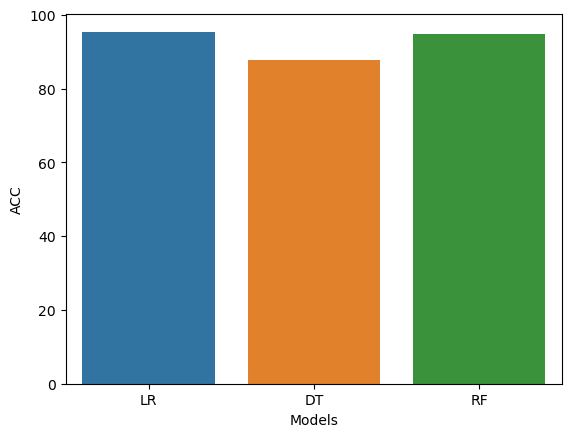

In [54]:
sns.barplot(x = 'Models', y = 'ACC', data= final_data)

In [55]:
X = credit_card_data.drop('Class',axis=1)
Y = credit_card_data['Class']

In [56]:
X.shape

(284807, 30)

In [57]:
Y.shape

(284807,)